<a href="https://colab.research.google.com/github/FelipeVillegasH/Sales_Prediction_Project_CodingDojo/blob/main/Sales_Prediction_Part4_DataBase_Cleaning_Preliminary_Analysis_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sales Prediction Project Part 2 Data Cleaning 
## By Felipe Villegas
### Created: 15.01.2022
#### Description: Data Cleaning and preliminary Statistical analysis of a food company database. 

In [53]:
import pandas as pd
import numpy as np

In [54]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
#spdf stands for: sales prediction data frame
spdf=pd.read_csv('/content/drive/MyDrive/CodingDojo/Proyectos/sales_predictions.csv')

In [56]:
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
spdf.info()
# note:  Item_Weight and Outlet_Size lack data 
spdf[['Outlet_Size','Item_Weight']].isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Outlet_Size,Item_Weight
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
8518,False,False
8519,True,False
8520,False,False
8521,False,False


In [58]:
# using loc we locate the NaN values of the variables in order to do a more descriptive analysis
# we do this first by generating variables of the NaN values for each respective column of analysis 
#Outlet_Size_NaN= spdf['Outlet_Size']=='NaN'
#Item_Weight_NaN= spdf['Item_Weight']=='NaN'
# then we locate the NaN values by using those filters in a loc function (do not forget that in .loc we do not use '' for the filter terms)
#NaN_Values= spdf.loc[Outlet_Size_NaN & Item_Weight_NaN,:]
#NaN_Values
# Note, this method didnt work cause it is intend to operate with operators, and since here we are analysing NaN values, we cannot opperate, and therefore 
# we cannot get an answer. 

In [59]:
# Using Logical operators we can print the NaN Values for the two Columns
#Outlet_Size_NaN= spdf['Outlet_Size']=='NaN'
#Item_Weight_NaN= spdf['Item_Weight']=='NaN'
#NaN_Values= spdf[(Outlet_Size_NaN)&(Item_Weight_NaN)]
#NaN_Values

In [60]:
spdf[spdf['Outlet_Size'].isna()]
# we locate the NaN values for the variable with .isna 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [61]:
spdf[spdf['Item_Weight'].isna()]
# we locate the NaN values for the variable with .isna 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [62]:
spdf['Outlet_Size'].isna().sum()

2410

In [63]:
spdf['Item_Weight'].isna().sum()

1463

In [64]:
# NaN Percentage for each variable: 
Item_Weight_NaN_Percentage= spdf['Item_Weight'].isna().sum()/len(spdf['Item_Weight'])
Item_Weight_NaN_Percentage*100

17.165317376510618

In [65]:
Outlet_Size_NaN_Percentage= spdf['Outlet_Size'].isna().sum()/len(spdf['Outlet_Size'])
Outlet_Size_NaN_Percentage*100

28.27642848762173

Therefore we should not just delete the columns because, the percentage of NaN values in the columns its not higher than 30%, also, the item weight are variables that could define if a product sales different regarding on their format and the Outlet size could be also used to segmentate productos by the store type so we strongly encourage not to delete the columns and niether promediate or add random values in the blank spots hence it could skew further analysis

In conclusion, we will generate an observation for the NaN spots in the variables (columns) so then, we can manage that data related on the item size or the outlet size they lack to to further analysis with products that do not consider this data.This could be usefull in general analysis on predicting tendecies on completely new products. we will do this by replacing the NaN Values on each variable with: the observation: No_Item_Weight and No_Outlet_Size respectively 

Aditional reazons for this Desition: 
we have also analysed the column **Outlet_Identifier** in order to try to find if an outlet lacking it's size, also has this data in another entry by looking for it by it's **Outlet_Identifier** but this was not the case so we could not assign an outlet size depending on it's Identifier. we tried this also with the **Outlet_Type** and didn't work 
we also tried this method of assigning observation based in other variables with similar data on the Item_Size, but there was no related data that we could link to assing to the NaN observations. 

In [66]:
# we proceed to replace the NaN spots (Item_Weight):
spdf['Item_Weight']=spdf['Item_Weight'].fillna('No_Item_Weight')

In [67]:
# we proceed to replace the NaN spots (Outlet_Size):
spdf['Outlet_Size']=spdf['Outlet_Size'].fillna('No_Outlet_Size')

In [68]:
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No_Outlet_Size,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
spdf.info()
# here we confirm if the corrections were made by matching the non-null counts on every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [70]:
Item_Weight_Analysis=spdf.groupby(['Item_Weight'])[['Item_Outlet_Sales']].mean()
Item_Weight_Analysis

,Item_Outlet_Sales
Item_Weight,
4.555,1761.706800
4.59,1267.683200
4.61,1993.595429
4.615,4078.025000
4.635,2184.489800
...,...
21.1,1851.472306
21.2,2763.735800
21.25,2199.192883


In [71]:
Item_Weight_Analysis=Item_Weight_Analysis.sort_values(by=['Item_Outlet_Sales'],ascending=[False])
Item_Weight_Analysis
# In general terms we can affirm that on average the most items sold are those of 5.9 in weight 

,Item_Outlet_Sales
Item_Weight,
5.905,5305.094400
5.845,4701.879600
8.000,4648.171733
8.050,4460.443875
5.695,4413.207743
...,...
6.905,456.738800
5.925,455.007720
6.400,371.516400


In [72]:
Item_Weight_Analysis.loc['No_Item_Weight',:]

Item_Outlet_Sales    2483.677474
Name: No_Item_Weight, dtype: float64

In [73]:
Item_Weight_Analysis.sum()

Item_Outlet_Sales    863855.977323
dtype: float64

In [74]:
Percentage_No_Item_Weight=(Item_Weight_Analysis.loc['No_Item_Weight',:]/Item_Weight_Analysis.sum())*100
Percentage_No_Item_Weight
# the items with no weight registered percentage out of the total historic sales is 0.28% hence we can conclude that this values will not affect substantially
# our further analysis  

Item_Outlet_Sales    0.287511
dtype: float64

In [75]:
spdf.describe()
# Also these are the main quick statistical summaries that we could use to analyse our data forehand

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [76]:
Item_Fat_Content_Analysis=spdf.groupby(['Item_Fat_Content']).sum()
Item_Fat_Content_Analysis
# we also realized that in order to clean our data we should Homologate similar terms in order to regularize the data 
# such as we see in the following dataframe the Item_Fat_Content expresses the same fat level in different terms which tend to skew or data
# therefore we use .... to fix this

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,
LF,21.054330,43857.1062,631348,6.552424e+05
Low Fat,326.541080,717390.8394,10167044,1.101503e+07
Regular,200.970026,409413.1214,5771667,6.457454e+06
low fat,7.313655,15071.7328,223539,2.338270e+05
reg,7.764190,15948.6810,233923,2.295765e+05


In [77]:
# we homologate the similar names of the observations with the method .replace and by calling the columns with []
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('LF', 'Low Fat')
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('reg', 'Regular')
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('low fat', 'Low Fat')


In [78]:
Item_Fat_Content_Analysis=spdf.groupby(['Item_Fat_Content']).sum()
Item_Fat_Content_Analysis
# finally we check that the homologation went well and so we can confirm that our data is clean and ready to be analysed

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,
Low Fat,354.909065,776319.6784,11021931,1.190409e+07
Regular,208.734216,425361.8024,6005590,6.687031e+06


In [79]:
item_weight_analysis=spdf.groupby(['Item_Identifier'])['Item_Weight'].unique()
print(item_weight_analysis)
# with this groupby analysis we realize that we could actualy complete the item weight based on the item identifier

Item_Identifier
DRA12                     [11.6]
DRA24    [19.35, No_Item_Weight]
DRA59     [8.27, No_Item_Weight]
DRB01     [7.39, No_Item_Weight]
DRB13                    [6.115]
                  ...           
NCZ30     [6.59, No_Item_Weight]
NCZ41                    [19.85]
NCZ42                     [10.5]
NCZ53      [9.6, No_Item_Weight]
NCZ54    [14.65, No_Item_Weight]
Name: Item_Weight, Length: 1559, dtype: object


In [80]:
# Since we have already used .fillna() to fill the NaN Values of the Item_Weight Variable, we need to replace these again with ceros 
# in order to make the further code work, which will replace the ceros with the existen weights for each product by Item_Identifier.
spdf['Item_Weight']=spdf['Item_Weight'].replace('No_Item_Weight', np.nan)
# Thus we code the following to fill the observations without weight 
Item_weight_fill = spdf[['Item_Identifier','Item_Weight']].dropna().drop_duplicates()
# rewrite the data frame spdf
spdf=spdf[['Item_Identifier',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',	'Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type',	'Item_Outlet_Sales']].merge(Item_weight_fill, 'left')
spdf=spdf[['Item_Identifier',	'Item_Weight', 'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',	'Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type',	'Item_Outlet_Sales']]
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No_Outlet_Size,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
# then we proceed to check if the values were assigned correctly
item_weight_analysis=spdf.groupby(['Item_Identifier'])['Item_Weight'].unique()
print(item_weight_analysis)

Item_Identifier
DRA12     [11.6]
DRA24    [19.35]
DRA59     [8.27]
DRB01     [7.39]
DRB13    [6.115]
          ...   
NCZ30     [6.59]
NCZ41    [19.85]
NCZ42     [10.5]
NCZ53      [9.6]
NCZ54    [14.65]
Name: Item_Weight, Length: 1559, dtype: object


In [107]:
# we realize that in order to do an accurate heatmap we need to eliminate the items with cero visibility which are not on sale anymore
spdf.drop(spdf.loc[spdf["Item_Visibility"]==0].index, inplace=True)

#Graphical Analysis

In [108]:
import matplotlib.pyplot as plt
!pip install mplcyberpunk
import mplcyberpunk
import numpy as np
import seaborn as sns

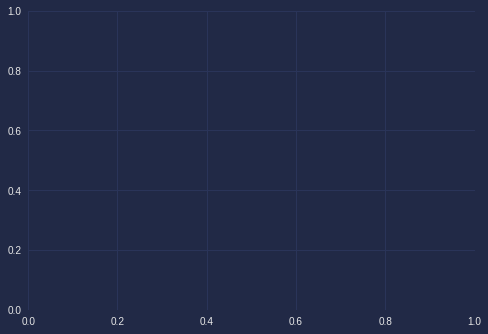

In [ ]:
# Style Setup
plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()
# We also set the fundamental parameters for all of our graphics
# Size: 
plt.rcParams['figure.figsize'] = (10, 8)

In [ ]:
# hereby we would like to prove if the products with the oldest establishment year are the ones with the more sales 
Year_of_stablishment_Sales= spdf.groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].sum()
Year_of_stablishment_Sales

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3.633620e+06
1987,2.142664e+06
1997,2.118395e+06
1998,1.883402e+05
1999,2.183970e+06
2002,2.036725e+06
2004,2.268123e+06
2007,2.167465e+06
2009,1.851823e+06


Text(0.5, 1.0, 'Outlet Average Sales by Establishment Year')

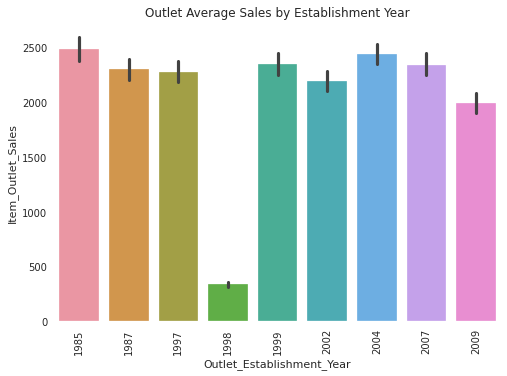

In [ ]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=spdf);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Outlet Average Sales by Establishment Year')
# Hypothesis rejected, there is no tendency shown that the establishment year is directly related to the number of sales with a 95% confidence interval

<Figure size 720x576 with 0 Axes>

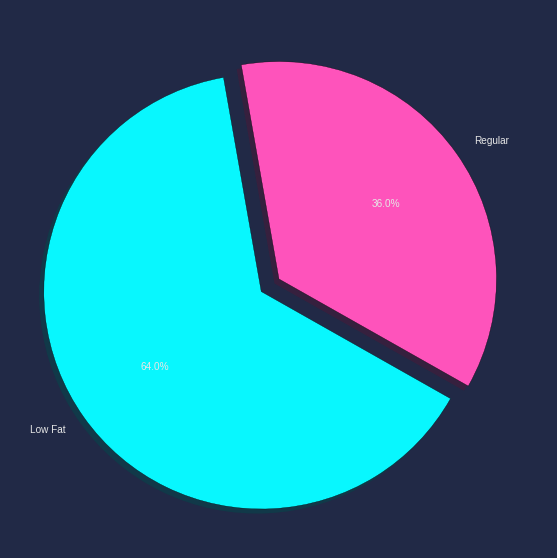

In [ ]:
from IPython.core.pylabtools import figsize
# With this graph we intent to understand which products present the more average sales based on its fat content
plt.tight_layout()
# the first value represents the width ant the second the height, make sure to do this before the coding 
plt.figure(figsize=(10,10));
slices=(Item_Fat_Content_Analysis['Item_Outlet_Sales'])
labels=['Low Fat','Regular']
explode=[0.1,0]
plt.pie(x=slices,labels=labels,shadow=True, explode=explode, startangle=100, 
        # to set the edges of the slices color
        wedgeprops={'edgecolor':'black'}, 
        # to set the percentages on the slices
        autopct='%1.1f%%');
# ax1.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
# No se ejecuta el titulo en el grafico por eso lo comento
# plt.title('Outlet Sales by Fat Content')
# we conclude that there is a tendecy of higher sales of Low Fat products

In [103]:
# first we set up the groupby:
Sales_by_type= spdf.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean()
Sales_by_type

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


Text(0.5, 1.0, 'Outlet Average Sales by Type')

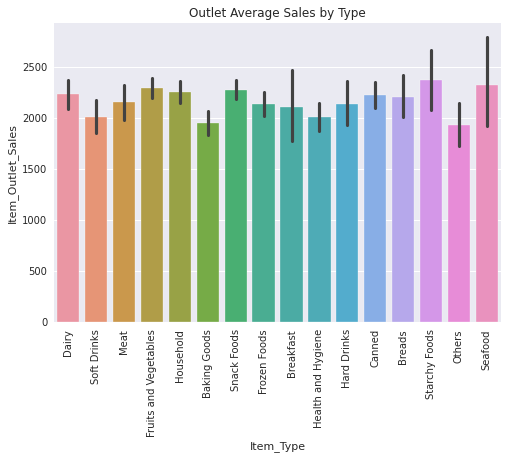

In [ ]:
# The most sold products by its type
import seaborn as sns
plt.style.use('seaborn')
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=spdf);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Outlet Average Sales by Type')
# in average the most sold product type is Starchy Foods while the less sold product type is Others each one with at a 95% confidence interval

# **Part 4:** Graphical analysis to understand the features of the products and the stablishments to improve the sales.


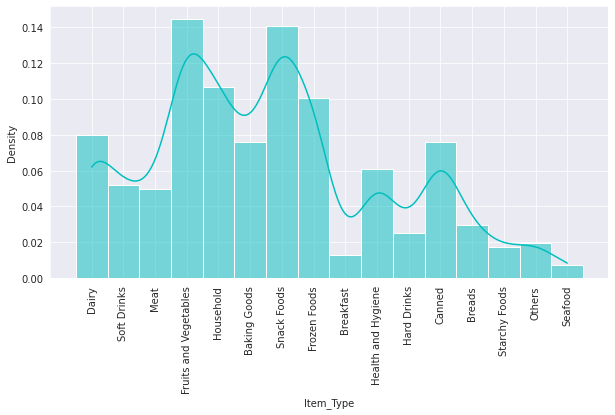

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import figure
# the dark grid style helps us to draw the array lines for each axle 
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)
sns.histplot(data=spdf, x='Item_Type',
             color='c',
             bins=10,
             kde=True, # kde helps us to mark a Gauss distribution line
             # binwidth=2
             # binrange=5
             stat='density' # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             );
plt.xticks(rotation=90);
# therefore approximately the 30% of the goods sold by all the stores is made up of the Fruits and vegetables and by the Snacks 
# Hence we should to further analysis regarding the profits to understand if we should modify this density, giving priority to stock the stores
# with the most profitable products.
# note that this does not mean that these are the productos with more sales, but the ones more stocked in the Shops

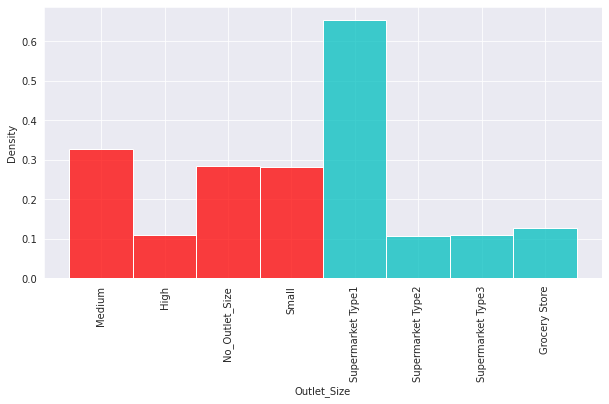

In [115]:
sns.histplot(data=spdf, x='Outlet_Size',
             color='r',
             bins=5,
             kde=False, # kde helps us to mark a Gauss distribution line
             stat='density', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);
sns.histplot(data=spdf, x='Outlet_Type',
             color='c',
             bins=5,
             kde=False, # kde helps us to mark a Gauss distribution line
             stat='density', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);
# We can conclude that more than the 60% of the Stores are Supermarkets type 1, in the other hand we cannot conclude 

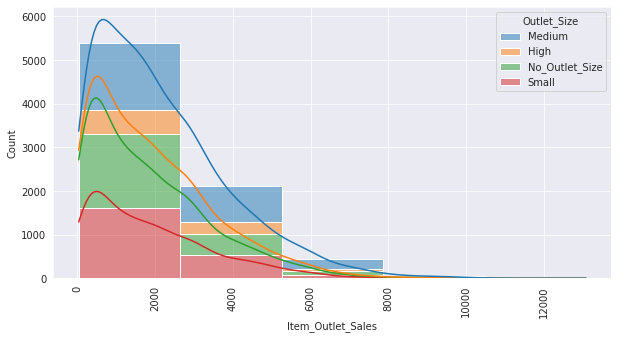

In [125]:
sns.histplot(data=spdf, x='Item_Outlet_Sales',
             hue='Outlet_Size',
             color='r',
             bins=5,
             kde=True, # kde helps us to mark a Gauss distribution line
             stat='count', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);

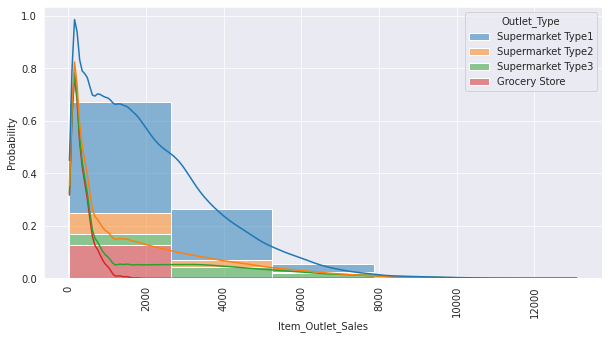

In [124]:
sns.histplot(data=spdf, x='Item_Outlet_Sales',
             hue='Outlet_Type',
             color='r',
             bins=5,
             kde=True, # kde helps us to mark a Gauss distribution line
             stat='probability', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


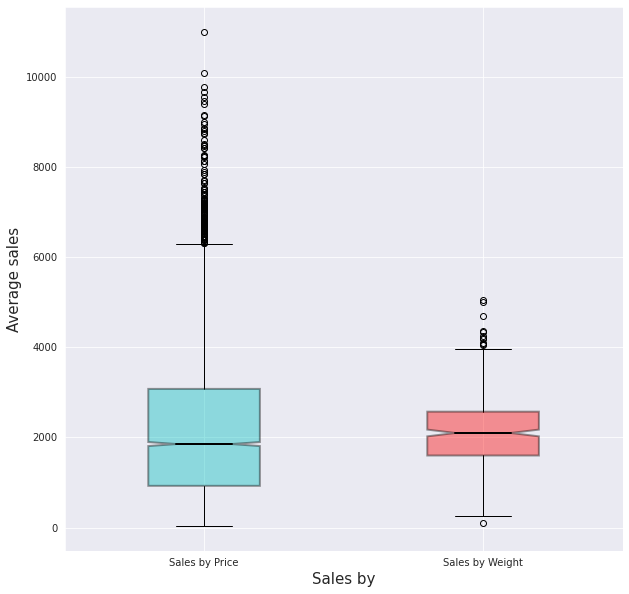

In [128]:
Average_Sales_by_fatcontent=spdf.groupby(['Item_MRP'])[['Item_Outlet_Sales']].mean()
Average_sales_by_Weight=spdf.groupby(['Item_Weight'])[['Item_Outlet_Sales']].mean()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
boxplots = axes.boxplot([Average_Sales_by_fatcontent, Average_sales_by_Weight], 
             notch = True, #muesca
             labels=['Sales by Price', 'Sales by Weight'],
             widths = .4,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='k'),
             boxprops = dict(linestyle='=', linewidth=2, color='Black', facecolor = 'c', alpha = .4));
boxplot1 = boxplots['boxes'][1]
boxplot1.set_facecolor('red')
plt.xlabel('Sales by', fontsize = 15);
plt.ylabel('Average sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [ ]:
sns.heatmap(spdf.,
# then we choose an appropiate color
# the human eye is more likely to direct its atention to the darker colors first, so then it is recomended to assign these colors to the higher values 
# for default the seaborn library assign colors the opposite way so it is important always to change them
            cmap='Blues',
            annot=True, # this works to show the values in the heatmap
            fmt='.0f',# to set the float number and the wanted decimal places
            linecolor='k',
            linewidth=1,
            xticklabels= False,
            yticklabels= False
            );
plt.xlabel('Predicted Label');
plt.ylabel('Actual Label');
plt.title('Accuracy:{}'.format(Accuracy));

In [129]:
spdf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018580,0.026995,-0.018205,0.012942
Item_Visibility,-0.018580,1.000000,-0.005700,-0.080920,-0.138558
Item_MRP,0.026995,-0.005700,1.000000,0.003266,0.567074
Outlet_Establishment_Year,-0.018205,-0.080920,0.003266,1.000000,-0.048233
Item_Outlet_Sales,0.012942,-0.138558,0.567074,-0.048233,1.000000


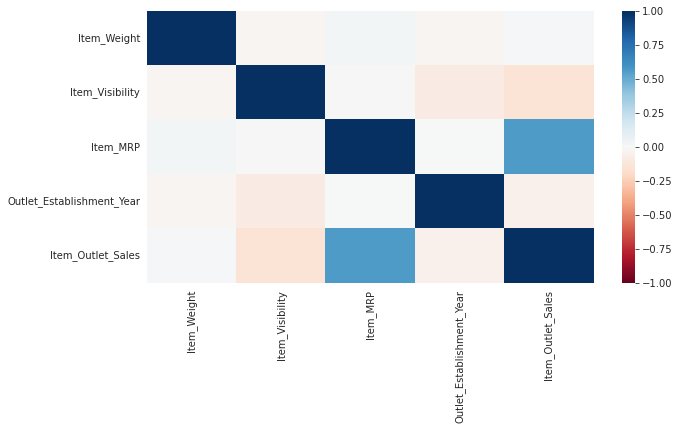

In [133]:
sns.heatmap(spdf.corr(),
            cmap='RdBu',
            vmin=-1,
            vmax=1);
# with this heatmap we can mainly appreciate the relationship between the variables, the main conclutions that we can obtain from this 
# come from assigning directly or inversely proportions between the relations 
# for instancethe Item Outlet sales certainly is inversely proportional to the Item price
# and allegedly the item visibility is not a defining variable to the sales